In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [2]:
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.shape

(7043, 21)

In [5]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [12]:
mean = df['TotalCharges'].mean()
df['TotalCharges'] = df['TotalCharges'].fillna(mean)

In [13]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [14]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [15]:
df['Churn'] = df['Churn'].map({"Yes":1 , "No":0})
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [18]:
X_base = df.drop('Churn',axis=1)
Y_base = df['Churn']

numerical_features = X_base.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_base.select_dtypes(include=['object']).columns.tolist()

In [19]:
preprocessor_base = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical_features),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_features)
    ]
)

In [20]:
preprocessor_base

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['customerID', 'gender', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [23]:
X_train_base , X_test_base , Y_train_base , Y_test_base = train_test_split(X_base,Y_base,test_size=0.2,random_state=42,stratify=Y_base) 

In [24]:
baseline_model = Pipeline(
    steps = [
        ('preprocessor', preprocessor_base),
        ('classifier',LogisticRegression(random_state=42,max_iter=1000))
    ]
)

In [25]:
baseline_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['customerID', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [26]:
baseline_model.fit(X_train_base,Y_train_base)
Y_pred_base = baseline_model.predict(X_test_base)

print("------BASELINE MODEL PERFORMANCE--------")

print(classification_report(Y_test_base,Y_pred_base))

------BASELINE MODEL PERFORMANCE--------
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



In [27]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [28]:
df_eng = df.copy()

In [30]:
bins = [0,12,24,36,48,60,72]
labels = ['0-1 Years' , '1-2 Years' , '2-3 Years' , '3-4 Years' , '4-5 Years' , '5+ Years']
df_eng['tenure_group'] = pd.cut( df_eng['tenure'] , bins=bins , labels=labels , right = False)

In [31]:
df_eng.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 Years
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-3 Years
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1 Years
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3-4 Years
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 Years


In [32]:
df_eng['MultipleLines'] = df_eng['MultipleLines'].replace({'No phone service': 'No'})
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df_eng[col] = df_eng[col].replace({'No internet service': 'No'})

In [33]:
df_eng['MultipleLines'].value_counts()

MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

In [34]:
df_eng.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 Years
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-3 Years
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1 Years
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3-4 Years
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 Years


In [35]:
df_eng['num_add_services'] = (df_eng[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)

In [36]:
df_eng.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,num_add_services
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 Years,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,2-3 Years,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1 Years,2
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3-4 Years,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 Years,0


In [37]:
df_eng['monthly_charge_ratio'] = df_eng['MonthlyCharges'] / (df_eng['tenure'] + 1) # +1 to avoid division by zero

In [38]:
df_eng.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,num_add_services,monthly_charge_ratio
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 Years,1,14.925000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,0,2-3 Years,2,1.627143
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1 Years,2,17.950000
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3-4 Years,3,0.919565
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 Years,0,23.566667


In [39]:
# Drop original tenure as we have a binned version now
df_eng.drop('tenure', axis=1, inplace=True)

# Define features (X) and target (y) for the engineered dataset
X_eng = df_eng.drop('Churn', axis=1)
y_eng = df_eng['Churn']

# Identify new feature types
numerical_features_eng = X_eng.select_dtypes(include=np.number).columns.tolist()
# Note: 'tenure_group' is now a categorical feature
categorical_features_eng = X_eng.select_dtypes(include=['object', 'category']).columns.tolist()

# Create the new preprocessing pipeline
preprocessor_eng = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_eng),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_eng)])

# Split data
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_eng, y_eng, test_size=0.2, random_state=42, stratify=y_eng)

# Create the full pipeline with the same classifier for a fair comparison
enhanced_model = Pipeline(steps=[('preprocessor', preprocessor_eng),
                                 ('classifier', LogisticRegression(random_state=42, max_iter=1000))])

# Train and evaluate the enhanced model
enhanced_model.fit(X_train_eng, y_train_eng)
y_pred_eng = enhanced_model.predict(X_test_eng)

print("--- Enhanced Model Performance (with Feature Engineering) ---")
print(classification_report(y_test_eng, y_pred_eng))

--- Enhanced Model Performance (with Feature Engineering) ---
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



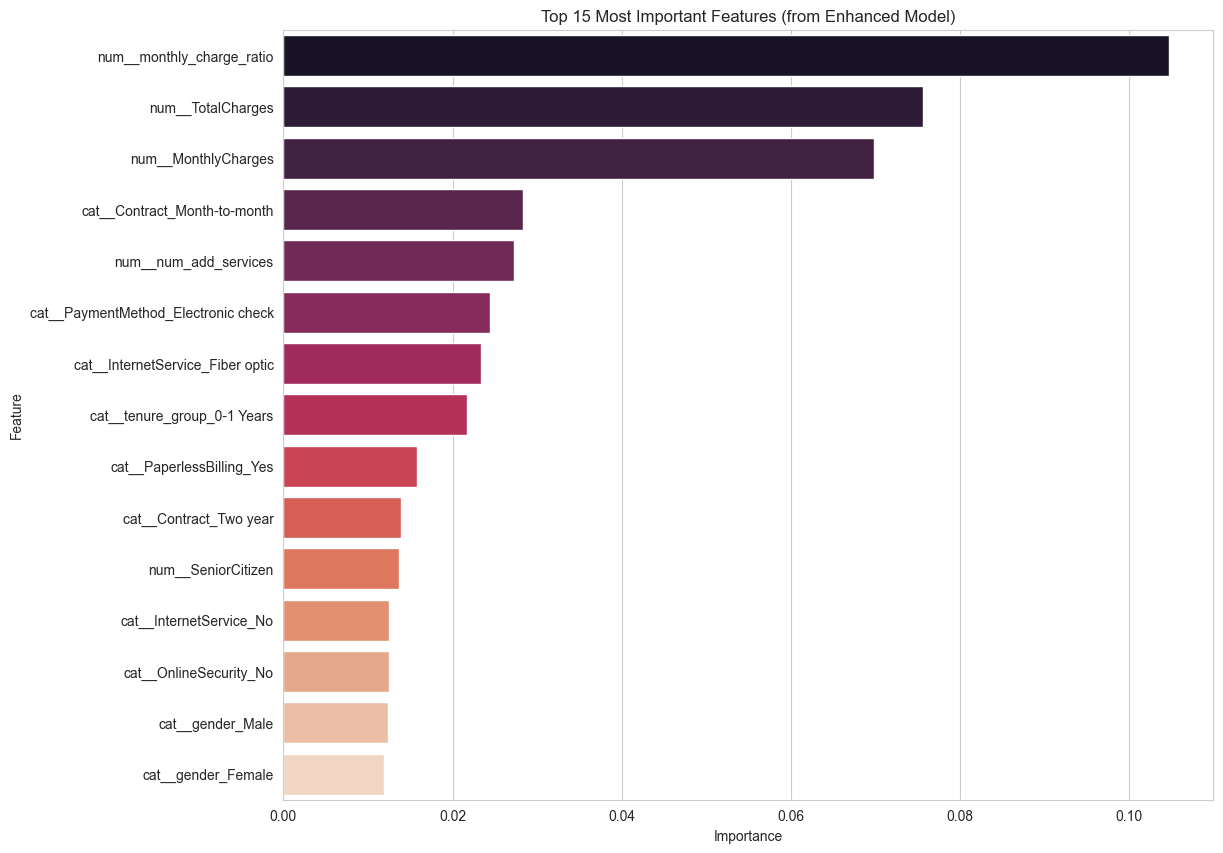

In [40]:
# To get feature importance, let's quickly train a RandomForest model with the engineered data
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor_eng),
                               ('classifier', RandomForestClassifier(random_state=42))])
rf_pipeline.fit(X_train_eng, y_train_eng)

# Extract feature names after one-hot encoding
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = rf_pipeline.named_steps['classifier'].feature_importances_

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket', hue='Feature', legend=False)
plt.title('Top 15 Most Important Features (from Enhanced Model)')
plt.show()

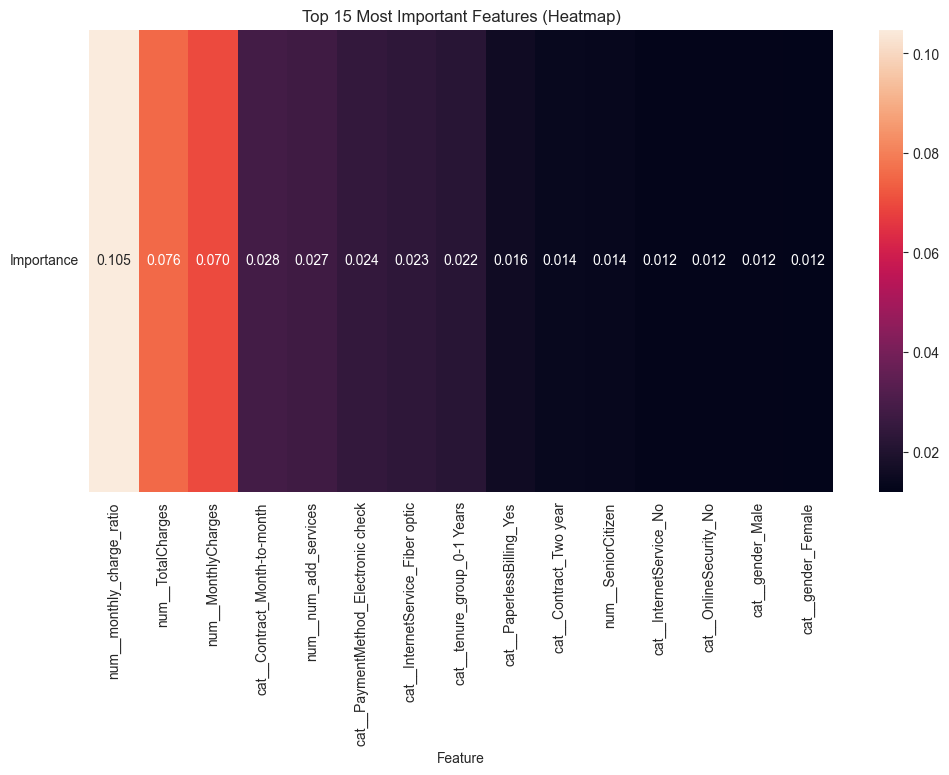

In [41]:
top_features = feature_importance_df.set_index("Feature").T  # transpose so features become columns

plt.figure(figsize=(12, 6))
sns.heatmap(top_features, cmap="rocket", annot=True, cbar=True, fmt=".3f")

plt.title("Top 15 Most Important Features (Heatmap)")
plt.yticks(rotation=0)  # keep "Importance" label horizontal
plt.show()

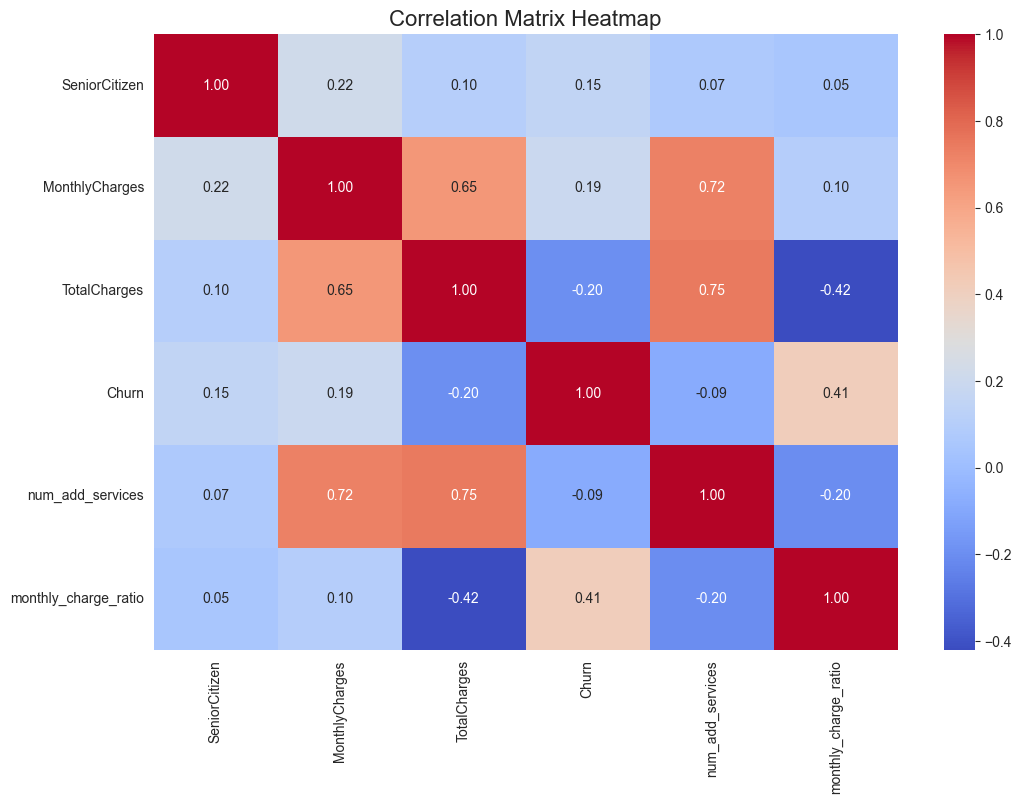

In [42]:
plt.figure(figsize=(12, 8))

# Compute correlation matrix only for numerical features
corr = df_eng.corr(numeric_only=True)

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()


In [43]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier to use as the base estimator for feature selection
rf_selector = RandomForestClassifier(random_state=42)

# Instantiate SelectFromModel
# Using 'median' as the threshold means features with importance greater than the median importance will be selected.
selector = SelectFromModel(estimator=rf_selector, threshold='median', prefit=False)

# Create a pipeline for feature selection
feature_selection_pipeline = Pipeline(steps=[('preprocessor', preprocessor_eng),
                                             ('selector', selector)])

# Fit the pipeline to the training data
feature_selection_pipeline.fit(X_train_eng, y_train_eng)

# Transform the training and testing data to get the selected features
X_train_selected = feature_selection_pipeline.transform(X_train_eng)
X_test_selected = feature_selection_pipeline.transform(X_test_eng)

# Print the shapes to compare
print(f"Original training data shape: {X_train_eng.shape}")
print(f"Selected training data shape: {X_train_selected.shape}")

Original training data shape: (5634, 22)
Selected training data shape: (5634, 2840)


In [44]:
# Create the full pipeline with the preprocessor and the classifier
selected_features_model = Pipeline(steps=[('preprocessor', preprocessor_eng),
                                         ('classifier', LogisticRegression(random_state=42, max_iter=1000))])

# Train the model using the selected features
selected_features_model.fit(X_train_eng, y_train_eng)

# Predict on the test set with selected features
y_pred_selected = selected_features_model.predict(X_test_eng)

print("--- Model Performance (with Selected Features) ---")
print(classification_report(y_test_eng, y_pred_selected))

--- Model Performance (with Selected Features) ---
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [48]:
print("--- Baseline Model Performance ---")
print(classification_report(Y_test_base, Y_pred_base))

print("\n--- Enhanced Model Performance (with Feature Engineering) ---")
print(classification_report(y_test_eng, y_pred_eng))

print("\n--- Model Performance (with Selected Features) ---")
print(classification_report(y_test_eng, y_pred_selected))

# Summarize the performance metrics
print("\n--- Performance Summary ---")
print("Metric         | Baseline | Enhanced | Selected Features")
print("---------------|----------|----------|-------------------")
print(f"Accuracy       | {accuracy_score(Y_test_base, Y_pred_base):<8.2f} | {accuracy_score(y_test_eng, y_pred_eng):<8.2f} | {accuracy_score(y_test_eng, y_pred_selected):<8.2f}")

# Extract F1-score for class 1 (Churn) from classification reports
report_base = classification_report(Y_test_base, Y_pred_base, output_dict=True)
report_eng = classification_report(y_test_eng, y_pred_eng, output_dict=True)
report_selected = classification_report(y_test_eng, y_pred_selected, output_dict=True)

f1_churn_base = report_base['1']['f1-score']
f1_churn_eng = report_eng['1']['f1-score']
f1_churn_selected = report_selected['1']['f1-score']

print(f"F1-Score       | {f1_churn_base:<8.2f} | {f1_churn_eng:<8.2f} | {f1_churn_selected:<8.2f}")

--- Baseline Model Performance ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409


--- Enhanced Model Performance (with Feature Engineering) ---
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409


--- Model Performance (with Selected Features) ---
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.52      0.59       374

    accuracy                    